In [1]:
# グラフを移動拡大縮小したい場合
%matplotlib notebook
# グラフをインラインで表示
# %matplotlib inline

#Cell_1.
import gc
import math
import pickle

import warnings
warnings.simplefilter('ignore')

import mylibs.mylib1 as mylib1
import mylibs.mylib2 as mylib2
import mylibs.mylib3 as mylib3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# 表示する行・列の数を設定
pd.options.display.max_rows = 8
pd.options.display.max_columns = 12

# matplotlib のフォントを設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
#Cell_2.
df_bp = pd.read_csv('public_stats/original/nhns_bp_mid_r2.csv', skiprows=0)

df_bp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,総 数,Unnamed: 4,20-29歳,...,Unnamed: 16,（再掲）40-89歳,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,人数,%,人数,...,%,人数,%,NaN,NaN,NaN
1,男性,収縮期（最高）血圧,総数,"1,289",100.0,63,...,100.0,"1,122",100.0,NaN,NaN,NaN
2,NaN,NaN,90mmHg未満,0,0,0,...,0.0,0,0.0,NaN,NaN,NaN
3,NaN,NaN,90- 99,12,1,6,...,0.2,5,0.5,NaN,NaN,NaN
4,NaN,NaN,100-109,65,5.0,14,...,1.9,30,2.9,NaN,NaN,NaN


In [3]:
#Cell_3.
df_bp = df_bp.loc[:, df_bp.columns[df_bp.iloc[0] != '%']]

df_bp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,総 数,20-29歳,30-39歳,...,60-69歳,70歳以上,（再掲）40-89歳,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,人数,人数,人数,...,人数,人数,人数,NaN,NaN,NaN
1,男性,収縮期（最高）血圧,総数,"1,289",63,93,...,340,502,"1,122",NaN,NaN,NaN
2,NaN,NaN,90mmHg未満,0,0,0,...,0,0,0,NaN,NaN,NaN
3,NaN,NaN,90- 99,12,6,2,...,2,1,5,NaN,NaN,NaN
4,NaN,NaN,100-109,65,14,19,...,9,8,30,NaN,NaN,NaN


In [4]:
#Cell_4.
df_bp = df_bp.loc[1:, df_bp.columns[:10]]
df_bp = df_bp.fillna(method='ffill')

df_bp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,総 数,20-29歳,30-39歳,40-49歳,50-59歳,60-69歳,70歳以上
1,男性,収縮期（最高）血圧,総数,"1,289",63,93,129,165,340,502
2,男性,収縮期（最高）血圧,90mmHg未満,0,0,0,0,0,0,0
3,男性,収縮期（最高）血圧,90- 99,12,6,2,4,1,2,1
4,男性,収縮期（最高）血圧,100-109,65,14,19,9,3,9,8
5,男性,収縮期（最高）血圧,110-119,173,19,29,27,30,30,36


In [5]:
#Cell_5.
df_bp.columns = ['sex', 'bp_type', 'bp_value', 'total',
                 '20s', '30s', '40s', '50s', '60s', '70s']

df_bp.tail()

,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s
48,女性,拡張期（最低）血圧,120-129,2,0,0,0,0,0,1
49,女性,拡張期（最低）血圧,130-139,0,0,0,0,0,0,0
50,女性,拡張期（最低）血圧,140ｍｍHg以上,0,0,0,0,0,0,0
51,注１）血圧の測定を行った20歳以上の者を集計対象とした。,拡張期（最低）血圧,140ｍｍHg以上,0,0,0,0,0,0,0
52,注２）数値は２回の測定値の平均値を用いた。なお、１回しか測定できなかった者については、その値...,拡張期（最低）血圧,140ｍｍHg以上,0,0,0,0,0,0,0


In [6]:
#Cell_6.
df_bp = df_bp.iloc[:50]
df_bp = df_bp.loc[df_bp.bp_value != '総数', :]

display(df_bp.head())

,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s
2,男性,収縮期（最高）血圧,90mmHg未満,0,0,0,0,0,0,0
3,男性,収縮期（最高）血圧,90- 99,12,6,2,4,1,2,1
4,男性,収縮期（最高）血圧,100-109,65,14,19,9,3,9,8
5,男性,収縮期（最高）血圧,110-119,173,19,29,27,30,30,36
6,男性,収縮期（最高）血圧,120-129,250,18,24,36,31,62,81


In [7]:
#Cell_7.
df_bp.sex[df_bp.sex == '男性'] = 'M'
df_bp.sex[df_bp.sex == '女性'] = 'F'
df_bp.bp_type[df_bp.bp_type == '収縮期（最高）血圧'] = 'sbp'
df_bp.bp_type[df_bp.bp_type == '拡張期（最低）血圧'] = 'dbp'
df_bp = df_bp.reset_index()
del df_bp['index']

df_bp

,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s
0,M,sbp,90mmHg未満,0,0,0,0,0,0,0
1,M,sbp,90- 99,12,6,2,4,1,2,1
2,M,sbp,100-109,65,14,19,9,3,9,8
3,M,sbp,110-119,173,19,29,27,30,30,36
...,...,...,...,...,...,...,...,...,...,...
42,F,dbp,110-119,6,0,0,1,2,1,1
43,F,dbp,120-129,2,0,0,0,0,0,1
44,F,dbp,130-139,0,0,0,0,0,0,0
45,F,dbp,140ｍｍHg以上,0,0,0,0,0,0,0


In [8]:
#Cell_8.
#visualization.
import seaborn as sns
df_m_sbp=df_bp[(df_bp['sex']=='M') & (df_bp['bp_type']=='sbp')]
df_m_dbp=df_bp[(df_bp['sex']=='M') & (df_bp['bp_type']=='dbp')]

df_m_sbp['bp_value_class'] = [85,95,105,115,125,135,145,155,165,175,185]
df_m_dbp['bp_value_class'] = [35,45,55,65,75,85,95,105,115,125,135,145]
#display(df_m_sbp.head())
display(df_m_dbp.head())
display(df_m_dbp.tail())


,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s,bp_value_class
11,M,dbp,40mmHg未満,0,0,0,0,0,0,0,35
12,M,dbp,40-49,0,0,0,0,0,0,0,45
13,M,dbp,50-59,12,1,1,0,0,1,7,55
14,M,dbp,60-69,143,21,16,10,5,18,76,65
15,M,dbp,70-79,366,21,33,39,44,80,152,75


,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s,bp_value_class
18,M,dbp,100-109,54,0,1,5,15,22,12,105
19,M,dbp,110-119,16,1,0,3,4,6,5,115
20,M,dbp,120-129,0,0,0,0,0,0,1,125
21,M,dbp,130-139,3,0,0,0,1,0,1,135
22,M,dbp,140ｍｍHg以上,1,0,0,1,0,0,0,145


In [9]:
#Cell_9.
print(df_m_sbp.info())
print(df_m_dbp.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             11 non-null     object
 1   bp_type         11 non-null     object
 2   bp_value        11 non-null     object
 3   total           11 non-null     object
 4   20s             11 non-null     object
 5   30s             11 non-null     object
 6   40s             11 non-null     object
 7   50s             11 non-null     object
 8   60s             11 non-null     object
 9   70s             11 non-null     object
 10  bp_value_class  11 non-null     int64 
dtypes: int64(1), object(10)
memory usage: 1.0+ KB
None
(12, 11)


In [10]:
#Cell_10.
df_m_sbp['total']=df_m_sbp['total'].astype("int")
df_m_dbp['total']=df_m_dbp['total'].astype("int")

<AxesSubplot:xlabel='bp_value_class'>

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


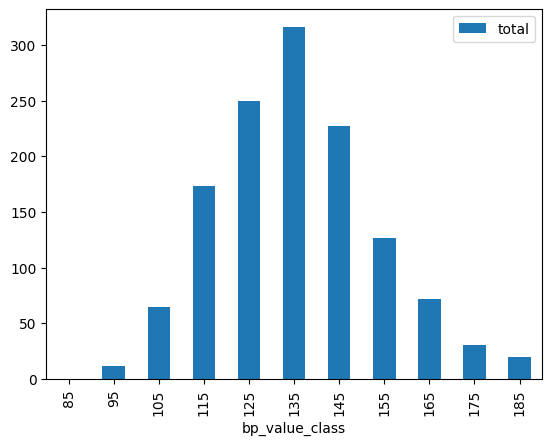

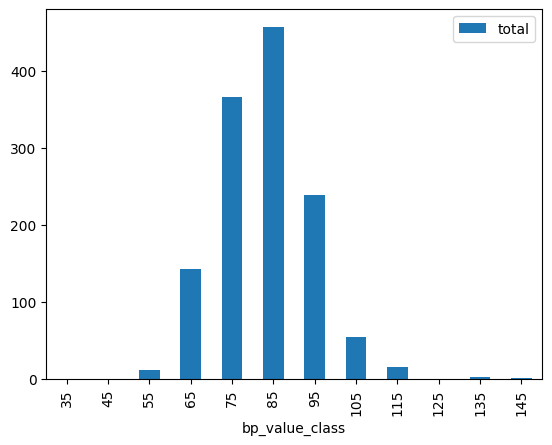

In [11]:
%matplotlib inline
#Cell_11.
df_m_sbp.plot.bar(x='bp_value_class',y='total')
df_m_dbp.plot.bar(x='bp_value_class',y='total')

In [12]:
#Cell_12.
df_bp.bp_value.unique()

array(['90mmHg未満', '90- 99', '100-109', '110-119', '120-129', '130-139',
       '140-149', '150-159', '160-169', '170-179', '180mmHg以上',
       '40mmHg未満', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99',
       '140ｍｍHg以上'], dtype=object)

In [13]:
#Cell_13.
sbp_min = np.concatenate([[70], np.arange(9, 19) * 10])

sbp_min

array([ 70,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180])

In [14]:
#Cell_14.
sbp_max = np.concatenate([sbp_min[1:] - 1, [199]])

sbp_max

array([ 89,  99, 109, 119, 129, 139, 149, 159, 169, 179, 199])

In [15]:
#Cell_15.
dbp_min = np.arange(4, 15) * 10

dbp_min

array([ 40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140])

In [16]:
#Cell_16.
dbp_max = np.concatenate([dbp_min[1:] - 1, [159]])

dbp_max

array([ 49,  59,  69,  79,  89,  99, 109, 119, 129, 139, 159])

In [17]:
#Cell_17.
dict_sbp_max = {k: v for (k, v) in zip(sbp_min, sbp_max)}
dict_dbp_max = {k: v for (k, v) in zip(dbp_min, dbp_max)}

dict_sbp_max

{70: 89,
 90: 99,
 100: 109,
 110: 119,
 120: 129,
 130: 139,
 140: 149,
 150: 159,
 160: 169,
 170: 179,
 180: 199}

In [18]:
#Cell_18.
df_bp = df_bp[df_bp['bp_value'] != '40mmHg未満'].copy()
df_bp['bp_min'] = np.tile(np.concatenate([sbp_min, dbp_min]), 2)
del df_bp['bp_value']
del df_bp['total']

df_bp

,sex,bp_type,20s,30s,40s,50s,60s,70s,bp_min
0,M,sbp,0,0,0,0,0,0,70
1,M,sbp,6,2,4,1,2,1,90
2,M,sbp,14,19,9,3,9,8,100
3,M,sbp,19,29,27,30,30,36,110
...,...,...,...,...,...,...,...,...,...
42,F,dbp,0,0,1,2,1,1,110
43,F,dbp,0,0,0,0,0,1,120
44,F,dbp,0,0,0,0,0,0,130
45,F,dbp,0,0,0,0,0,0,140


In [19]:
#Cell_19.
df_bp.dtypes

sex        object
bp_type    object
20s        object
30s        object
            ...  
50s        object
60s        object
70s        object
bp_min      int64
Length: 9, dtype: object

In [20]:
#Cell_20.
df_bp[df_bp.columns[2:]] = df_bp[df_bp.columns[2:]].copy().astype('int16')

df_bp.dtypes

sex        object
bp_type    object
20s         int16
30s         int16
            ...  
50s         int16
60s         int16
70s         int16
bp_min      int16
Length: 9, dtype: object

In [21]:
#Cell_21.
ages = df_bp.columns[2:8]  # ages = ['20s', ... , '70s']
# SBP の男性回答者数
df_bp.loc[(df_bp.sex == 'F') & (df_bp.bp_type == 'sbp'), ages].sum()

20s     72
30s    163
40s    272
50s    272
60s    418
70s    627
dtype: int64

In [22]:
#Cell_22.
# DBP の男性回答者数
df_bp.loc[(df_bp.sex == 'F') & (df_bp.bp_type == 'dbp'), ages].sum()

20s     72
30s    163
40s    272
50s    272
60s    418
70s    627
dtype: int64

In [23]:
#Cell_23.
sex = 'M'
bp_type = 'sbp'
age = '20s'

# 指定する (sex, bp_type, age) における回答者数リスト
ix = (df_bp.sex == sex) & (df_bp.bp_type == bp_type)
n = df_bp.loc[ix, age].values

# リスト n に対応する bp_min リスト
bp_min = df_bp.loc[ix, 'bp_min'].values

print('n =', n)
print('bp_min =', bp_min)

n = [ 0  6 14 19 18  8  0  1  0  0  0]
bp_min = [ 70  90 100 110 120 130 140 150 160 170 180]


In [24]:
#Cell_24.
bp_min.repeat(n)

array([ 90,  90,  90,  90,  90,  90, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 130, 130, 130, 130, 130, 130, 130, 130,
       150], dtype=int16)

In [25]:
#Cell_25.
bp_min.repeat(n)
dict_bp_min_dist = {}
dict_bp_min_dist['M'] = {}
dict_bp_min_dist['M']['dbp'] = {}
dict_bp_min_dist['M']['sbp'] = {}
dict_bp_min_dist['F'] = {}
dict_bp_min_dist['F']['dbp'] = {}
dict_bp_min_dist['F']['sbp'] = {}

for sex in ['M', 'F']:
    for bp_type in ['sbp', 'dbp']:
        for age in ages:
            dict_bp_min_dist[sex][bp_type][age] = {}
            ix = (df_bp.sex == sex) & (df_bp.bp_type == bp_type)
            n = df_bp.loc[ix, age].values
            bp_min = df_bp.loc[ix, 'bp_min'].values
            dict_bp_min_dist[sex][bp_type][age] = bp_min.repeat(n)

In [26]:
#Cell_26.
dict_bp_min_dist['M']['sbp']['20s']

array([ 90,  90,  90,  90,  90,  90, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 130, 130, 130, 130, 130, 130, 130, 130,
       150], dtype=int16)

In [27]:
#Cell_27.
import pickle

f = open('./public_stats/processed/dict_bp_min_dist.binaryfile', 'wb')  # wb: Write Binary
pickle.dump(dict_bp_min_dist, f)
f.close()

In [28]:
#Cell_28.
f = open('./public_stats/processed/dict_bp_min_dist.binaryfile', 'rb')  # rb: Read Binary
dict_bp_min_dist = pickle.load(f)
f.close()

dict_bp_min_dist['M']['sbp']['20s']

array([ 90,  90,  90,  90,  90,  90, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 130, 130, 130, 130, 130, 130, 130, 130,
       150], dtype=int16)

In [29]:
#Cell_29.
f = open('./public_stats/processed/dict_dbp_max.binaryfile', 'wb')  # wb: Write Binary
pickle.dump(dict_dbp_max, f)
f.close()

f = open('./public_stats/processed/dict_sbp_max.binaryfile', 'wb')  # wb: Write Binary
pickle.dump(dict_sbp_max, f)
f.close()

In [30]:
#Cell_30.
f = open('./public_stats/processed/dict_dbp_max.binaryfile', 'rb')  # rb: Read Binary
dict_dbp_min = pickle.load(f)
f.close()

dict_dbp_min

{40: 49,
 50: 59,
 60: 69,
 70: 79,
 80: 89,
 90: 99,
 100: 109,
 110: 119,
 120: 129,
 130: 139,
 140: 159}

In [31]:
#Cell_31.
f = open('./public_stats/processed/dict_sbp_max.binaryfile', 'rb')  # rb: Read Binary
dict_sbp_min = pickle.load(f)
f.close()

dict_sbp_min

{70: 89,
 90: 99,
 100: 109,
 110: 119,
 120: 129,
 130: 139,
 140: 149,
 150: 159,
 160: 169,
 170: 179,
 180: 199}

In [32]:
#Cell_32.
df_bp.to_csv('./public_stats/processed/df_bp.csv', index=False)

df_bp = pd.read_csv('./public_stats/processed/df_bp.csv')
df_bp

,sex,bp_type,20s,30s,40s,50s,60s,70s,bp_min
0,M,sbp,0,0,0,0,0,0,70
1,M,sbp,6,2,4,1,2,1,90
2,M,sbp,14,19,9,3,9,8,100
3,M,sbp,19,29,27,30,30,36,110
...,...,...,...,...,...,...,...,...,...
40,F,dbp,0,0,1,2,1,1,110
41,F,dbp,0,0,0,0,0,1,120
42,F,dbp,0,0,0,0,0,0,130
43,F,dbp,0,0,0,0,0,0,140


### 血圧情報の擬似生成と可視化

In [33]:
#Cell_33.
def calc_bp_class(dbp, sbp):
    return ((dbp >= 80) | (sbp >= 120)) * 1 \
         + ((dbp >= 85) | (sbp >= 130)) * 1 \
         + ((dbp >= 90) | (sbp >= 140)) * 1 \
         + ((dbp >= 100) | (sbp >= 160)) * 1 \
         + ((dbp >= 110) | (sbp >= 180)) * 1


# 年齢ごとにマーカーの色を変える
dict_color = {'20s': 'r', '30s': 'orange', '40s': 'y',
              '50s': 'g', '60s': 'b', '70s': 'purple'}

# マーカーを血圧分類値にする
dict_marker = {0: '$0$', 1: '$1$', 2: '$2$', 3: '$3$', 4: '$4$', 5: '$5$'}

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 3 3 5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 1 2 1 2 1 1 1 1 2 1 2 2 2 1
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 5 5 5 5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


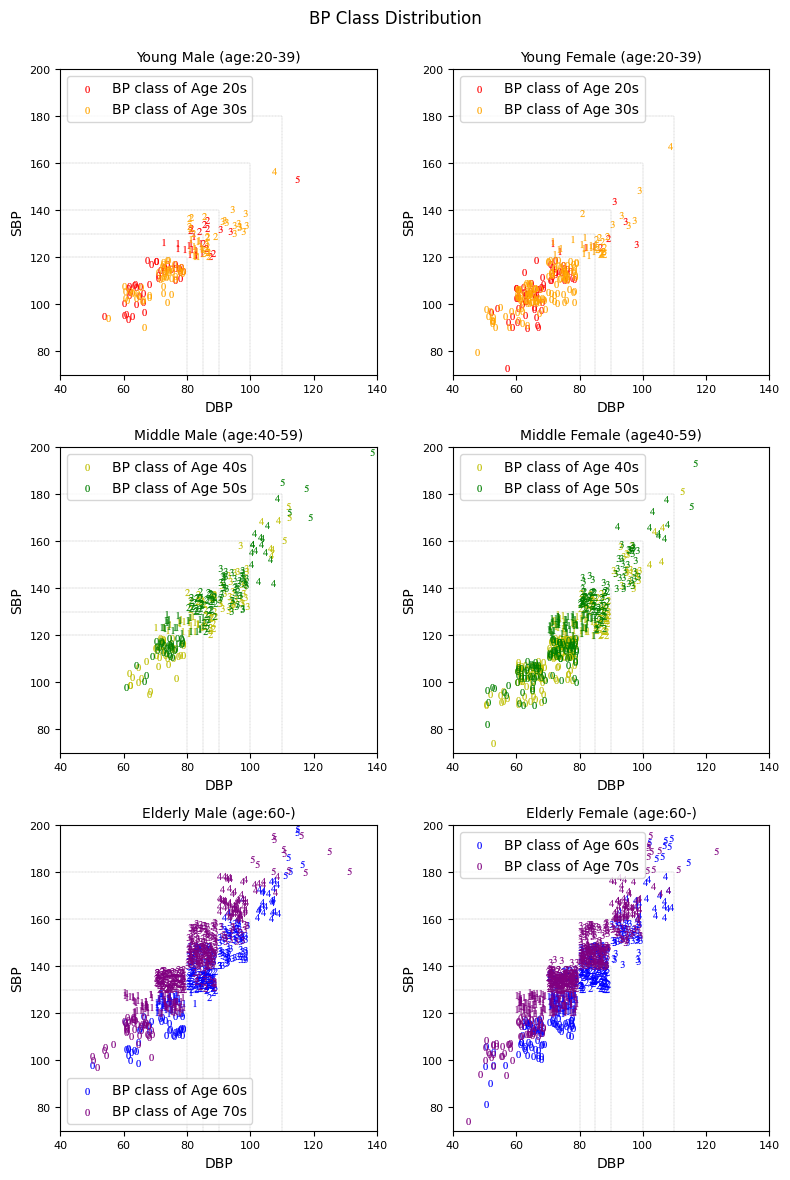

In [34]:
#Cell_34.
# 表示の大きさと解像度を設定
fig = plt.figure(figsize=(8, 12))
fig.suptitle('BP Class Distribution')

# 6つの散布図を同時に表示
ax_My = fig.add_subplot(321)  # Male   Young
ax_Fy = fig.add_subplot(322)  # Female Young
ax_Mm = fig.add_subplot(323)  # Male   Middle
ax_Fm = fig.add_subplot(324)  # Female Middle
ax_Me = fig.add_subplot(325)  # Male   Elderly
ax_Fe = fig.add_subplot(326)  # Female Elderly

rs = 0
np.random.seed(rs)

sexes = ['M', 'F']
ages = df_bp.columns[2:8]

########以下を埋めで実装せよ。##########


for sex in sexes:
    for age in ages:
        sbp_min = dict_bp_min_dist[sex]['sbp'][age]
        sbp_max = [dict_sbp_max[sbpm] for sbpm in sbp_min]
        dbp_min = dict_bp_min_dist[sex]['dbp'][age]
        dbp_max = [dict_dbp_max[dbpm] for dbpm in dbp_min]
        n = len(sbp_min)

        # SBP を乱数生成
        sbp = np.random.rand(n) * (sbp_max - sbp_min) + sbp_min
        rs = rs + 1
        np.random.seed(rs)

        # DBP を乱数生成
        dbp = np.random.rand(n) * (dbp_max - dbp_min) + dbp_min
        rs = rs + 1
        np.random.seed(rs)

        # 軸を選ぶ
        if sex == 'M' and (age == '20s' or age == '30s'):
            ax = ax_My
        elif sex == 'M' and (age == '40s' or age == '50s'):
            ax = ax_Mm
        elif sex == 'M' and (age == '60s' or age == '70s'):
            ax = ax_Me
        elif sex == 'F' and (age == '20s' or age == '30s'):
            ax = ax_Fy
        elif sex == 'F' and (age == '40s' or age == '50s'):
            ax = ax_Fm
        else:
            ax = ax_Fe

        # 各性別・年齢区分における最初の人だけ凡例をつける
        marker = calc_bp_class(dbp, sbp)
        print(marker)
        for m in np.arange(6):
            x = dbp[marker == m]
            y = sbp[marker == m]
            if m == 0:
                ax.scatter(x, y, c=dict_color[age], marker=dict_marker[m],
                           s=25, linewidth=0.1, label='BP class of Age ' + age)
            else:
                ax.scatter(x, y, c=dict_color[age], marker=dict_marker[m],
                           s=25, linewidth=0.1)

axes = [ax_My, ax_Mm, ax_Me, ax_Fy, ax_Fm, ax_Fe]

# 血圧分類の境界を作成
for ax in axes:
    # vertical lines
    ax.plot([80, 80], [70, 120], linestyle='--', c='grey', linewidth=0.2)
    ax.plot([85, 85], [70, 130], linestyle='--', c='grey', linewidth=0.2)
    ax.plot([90, 90], [70, 140], linestyle='--', c='grey', linewidth=0.2)
    ax.plot([100, 100], [70, 160], linestyle='--', c='grey', linewidth=0.2)
    ax.plot([110, 110], [70, 180], linestyle='--', c='grey', linewidth=0.2)
    # horizontal lines
    ax.plot([40, 80], [120, 120], linestyle='--', c='grey', linewidth=0.2)
    ax.plot([40, 85], [130, 130], linestyle='--', c='grey', linewidth=0.2)
    ax.plot([40, 90], [140, 140], linestyle='--', c='grey', linewidth=0.2)
    ax.plot([40, 100], [160, 160], linestyle='--', c='grey', linewidth=0.2)
    ax.plot([40, 110], [180, 180], linestyle='--', c='grey', linewidth=0.2)

# 各散布図にタイトルを追加
titles = ['Young Male (age:20-39)', 'Middle Male (age:40-59)',
          'Elderly Male (age:60-)', 'Young Female (age:20-39)',
          'Middle Female (age40-59)', 'Elderly Female (age:60-)']
for ax, title in zip(axes, titles):
    ax.set_xlabel('DBP', fontsize=10)
    ax.set_ylabel('SBP', fontsize=10)
    ax.set_xlim(40, 140)
    ax.set_ylim(70, 200)
    ax.set_title(title, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.legend(fontsize=10)

# 散布図同士の間隔調整
plt.tight_layout()
plt.subplots_adjust(top=0.93)